<a href="https://colab.research.google.com/github/AshishShinde03/BritishAirwaysProject/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msno

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'

# create an empty list to store the extracted data
reviews_list = []

for page_num in range(1, 101):
    params = {'page': page_num}
    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    review_blocks = soup.find_all('div', class_='tc_mobile')

    for block in review_blocks:
        try:
            # Detailed_review = block.find('td', class_='text_content').find_next('td').text.strip()
            Detailed_review = block.find('div', class_='text_content').text.strip()
        except AttributeError:
            Detailed_review = "N/A"
        try:
            type_of_traveler = block.find('td', class_='review-rating-header type_of_traveller').find_next('td').text.strip()
        except AttributeError:
            type_of_traveler = "N/A"
        try:
            cabin_flown = block.find('td', class_='review-rating-header cabin_flown').find_next('td').text.strip()
        except AttributeError:
            cabin_flown = "N/A"
        try: 
            route = block.find('td', class_='review-rating-header route').find_next('td').text.strip()
        except AttributeError:
            route = "N/A" 
        try:
            date_flown = block.find('td', class_='review-rating-header date_flown').find_next('td').text.strip()
        except AttributeError:
            date_flown = "N/A"
        try:
            recommended = block.find('td', class_='review-rating-header recommended').find_next('td').text.strip()
        except AttributeError:
            recommended = "N/A"
        try:
            cabin_staff_service = block.find('td', class_='review-rating-header cabin_staff_service').find_next('td').find_all('span', class_='fill')
            cabin_staff_service_rating = len(cabin_staff_service)
        except AttributeError:
            cabin_staff_service = "N/A"
        try:
            food_and_beverages = block.find('td', class_='review-rating-header food_and_beverages').find_next('td').find_all('span', class_='fill')
            food_and_beverages_rating = len(food_and_beverages)
        except AttributeError:
            food_and_beverages = "N/A"
        try:
            ground_service = block.find('td', class_='review-rating-header ground_service').find_next('td').find_all('span', class_='fill')
            ground_service_rating = len(ground_service)
        except AttributeError:
            ground_service = "N/A"
        try:
            value_for_money = block.find('td', class_='review-rating-header value_for_money').find_next('td').find_all('span', class_='fill')
            value_for_money_rating = len(value_for_money)
        except AttributeError:
            value_for_money = "N/A"
        
        # add the extracted data as a dictionary to the list
        review_dict = {
            'Detailed_review': Detailed_review,
            'Type of traveler': type_of_traveler,
            'Cabin flown': cabin_flown,
            'Route': route,
            'Date flown': date_flown,
            'Recommended': recommended,
            'Cabin Staff Service': cabin_staff_service_rating,
            'Food & Beverages': food_and_beverages_rating,
            'Ground Service': ground_service_rating,
            'Value for Money': value_for_money_rating
        }
        reviews_list.append(review_dict)

# create a dataframe from the list
df = pd.DataFrame(reviews_list)

# export the dataframe to an excel file
df.to_excel('british_airways_reviews.xlsx', index=False)
df.to_csv('british_airways_reviews.csv', index=False)


In [6]:
df = pd.read_csv('/content/british_airways_reviews.csv')

In [7]:
df

,Detailed_review,Type of traveler,Cabin flown,Route,Date flown,Recommended,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1


In [8]:
df = df.rename(columns={'Type of traveler': 'Type_of_traveler', 'Cabin flown': 'Cabin_flown', 'Date flown': 'Date_flown', 'Cabin Staff Service': 'Cabin_Staff_Service', 'Food & Beverages': 'Food_Beverages', 'Ground Service': 'Ground_Service', 'Value for Money': 'Value_for_Money'})

In [9]:
df  

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1


# Data Cleaning

Handling Missing Values

In [10]:
# replace "N/A" with NaN
df = df.replace('N/A', pd.NaT)

# generate boolean mask for missing values
mask = df.isna()

# count the number of missing values in each column
missing_counts = mask.sum()

# calculate the percentage of missing values in each column
missing_percentages = 100 * missing_counts / len(df)

# print the results
print(f"Number of missing values:\n{missing_counts}\n")
print(f"Percentage of missing values:\n{missing_percentages}\n")

Number of missing values:
Detailed_review          0
Type_of_traveler       770
Cabin_flown              2
Route                  774
Date_flown             778
Recommended              0
Cabin_Staff_Service      0
Food_Beverages           0
Ground_Service           0
Value_for_Money          0
dtype: int64

Percentage of missing values:
Detailed_review         0.000000
Type_of_traveler       21.868787
Cabin_flown             0.056802
Route                  21.982391
Date_flown             22.095995
Recommended             0.000000
Cabin_Staff_Service     0.000000
Food_Beverages          0.000000
Ground_Service          0.000000
Value_for_Money         0.000000
dtype: float64



<Axes: >

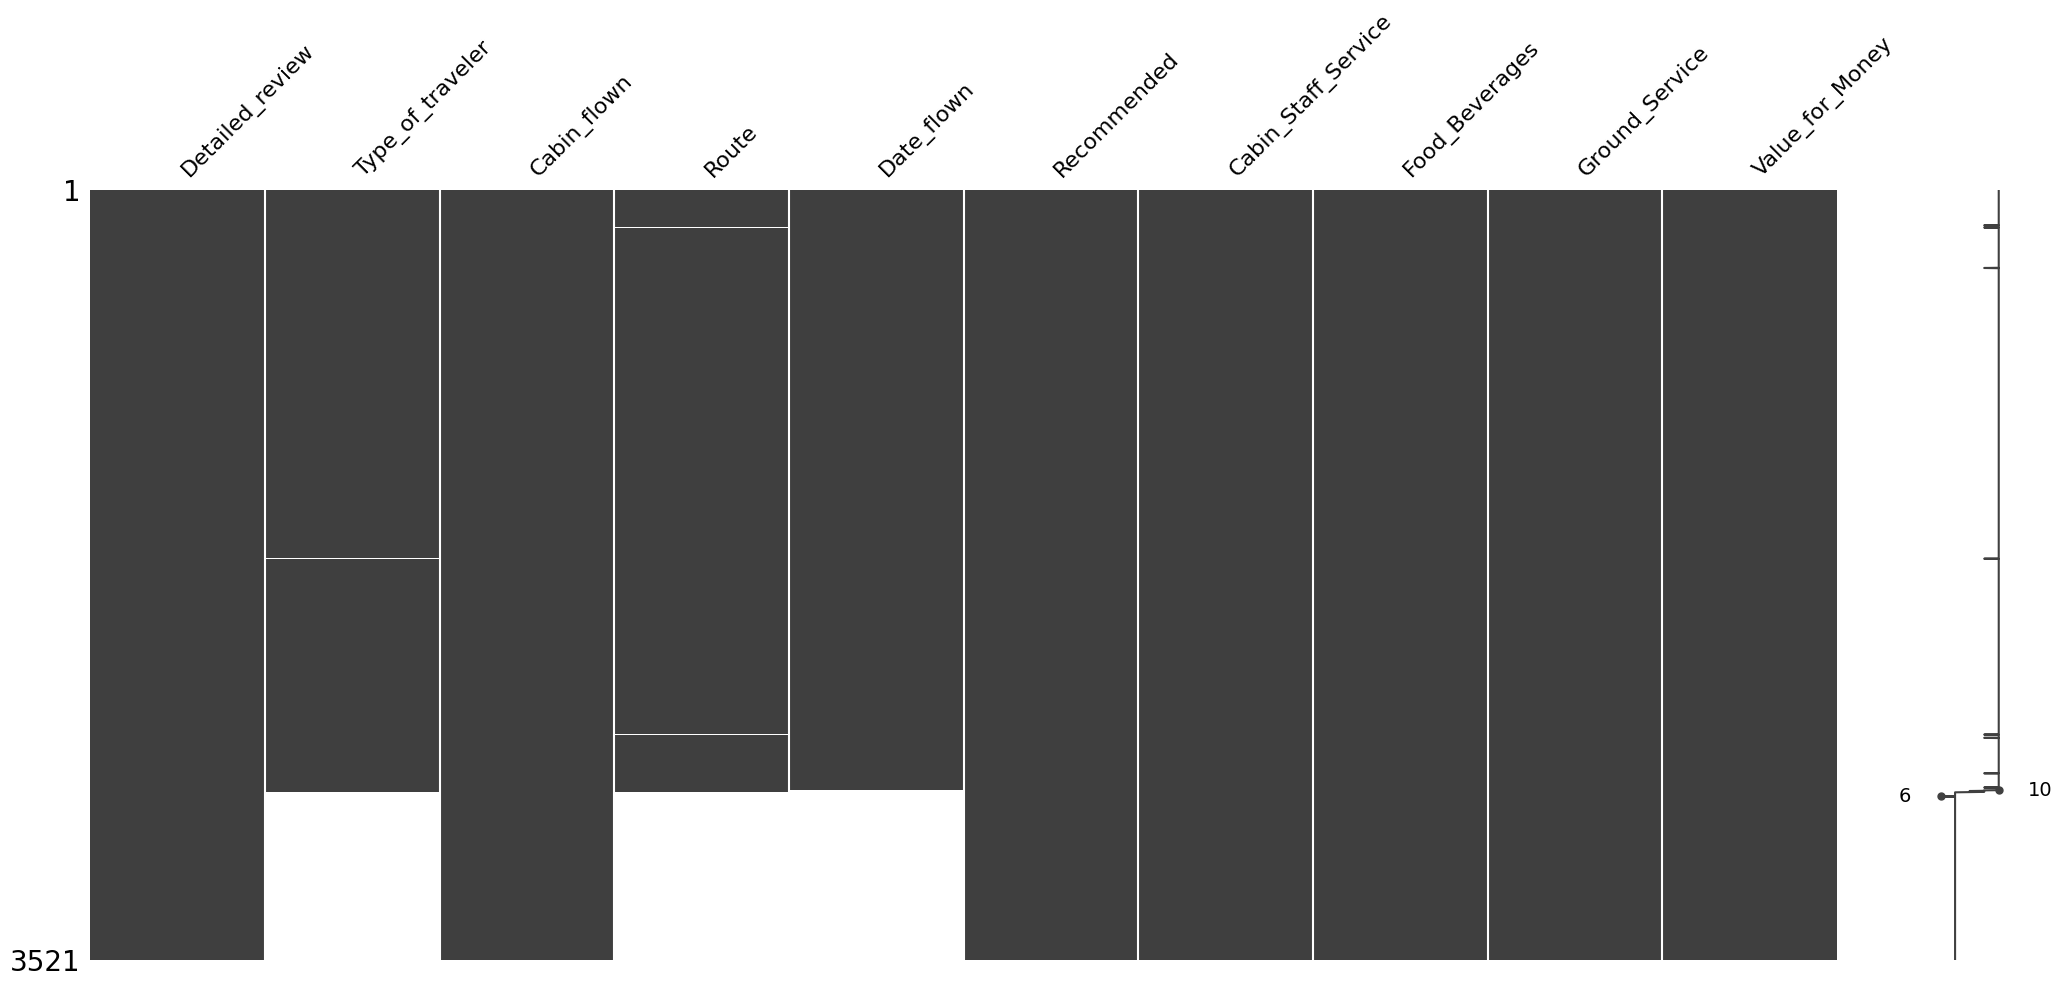

In [11]:
# plot the missing value matrix
msno.matrix(df)

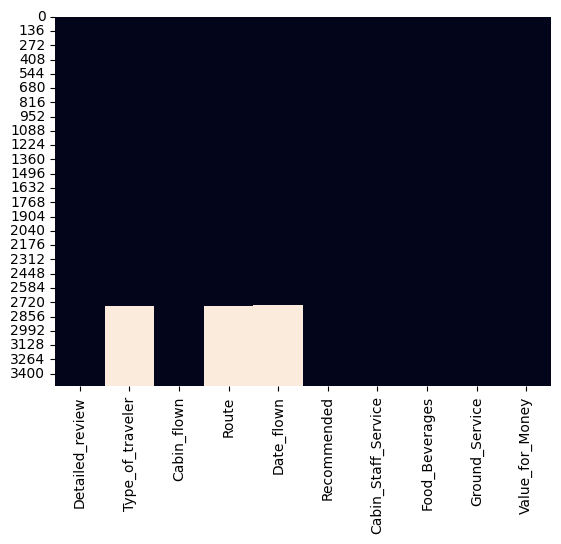

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [13]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1


In [14]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1


In [15]:
# Create a boolean mask for the rows that contain '✅ Trip Verified' or 'Not Verified'
mask_verified = df['Detailed_review'].str.contains('✅ Trip Verified')
mask_not_verified = df['Detailed_review'].str.contains('Not Verified')

# Create a new column named 'Verified_NotVerified' that separates the verified and not verified values
df.loc[mask_verified, 'Verified_NotVerified'] = 'Verified'
df.loc[mask_not_verified, 'Verified_NotVerified'] = 'Not Verified'


# Few metrics for airlines to measure customer satisfaction

In [16]:
df['CSAT'] = (df['Cabin_Staff_Service'] + df['Food_Beverages'] + df['Ground_Service'] + df['Value_for_Money']) / 4


In [17]:
# calculate the total CSAT score
total_csat = round(df['CSAT'].mean(), 2)

print('Total CSAT score:', total_csat)

Total CSAT score: 2.9


In [18]:
# Total CSAT score for Verified reviews
verified_df = df[df['Verified_NotVerified'] == 'Verified']
total_csat_verified = round(verified_df['CSAT'].mean(), 2)

print('Total CSAT score for Verified reviews:', total_csat_verified)


Total CSAT score for Verified reviews: 2.82


In [19]:
Notverified_df = df[df['Verified_NotVerified'] == 'Not Verified']
total_csat_Notverified = round(Notverified_df['CSAT'].mean(), 2)

print('Total CSAT score for Non Verified reviews:', total_csat_Notverified)

Total CSAT score for Non Verified reviews: 2.72


**Here their is not a siginificant difference between Verified and Non Verified Customer tag  and hence does not affect the overall CSAT score significantly hence we will use overall CSAT Score**

In [20]:
# calculate the overall CSAT percentage
overall_csat = round(df['CSAT'].mean() * 20, 2)

print(f"The overall CSAT percentage is: {overall_csat}%")

The overall CSAT percentage is: 58.06%


# CSAT by Cabin Flown

In [21]:
# group the dataframe by Cabin_flown and calculate mean CSAT for each group
csat_by_cabin = round(df.groupby('Cabin_flown')['CSAT'].mean() * 20, 2)

# print the result
print(csat_by_cabin)


Cabin_flown
Business Class     61.16
Economy Class      55.26
First Class        66.64
Premium Economy    57.40
Name: CSAT, dtype: float64


<ipython-input-22-65ec0827179a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


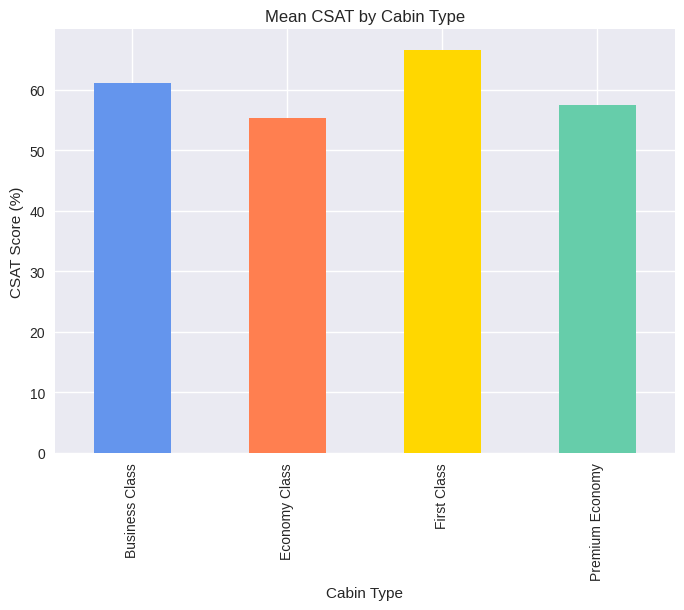

In [22]:
import matplotlib.pyplot as plt

# set style and color scheme
plt.style.use('seaborn')
colors = ['cornflowerblue', 'coral', 'gold', 'mediumaquamarine', 'orchid']

# create bar chart of mean CSAT by cabin type
csat_by_cabin.plot(kind='bar', color=colors)

# customize chart labels and title
plt.title('Mean CSAT by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('CSAT Score (%)')

# display the chart
plt.show()


In [23]:
# calculate the NPS score for verified
promoters_verified = len(verified_df[verified_df['Recommended'] == 'yes'])
detractors_verified = len(verified_df[verified_df['Recommended'] == 'no'])
total_responses_verified = len(verified_df)
nps_score_verified = round((promoters_verified - detractors_verified) / total_responses_verified * 100,2)

print("Verified NPS score:", nps_score_verified)

Verified NPS score: -27.25


In [24]:
# calculate the NPS score Non Verified 
promoters_Notverified = len(Notverified_df[Notverified_df['Recommended'] == 'yes'])
detractors_Notverified = len(Notverified_df[Notverified_df['Recommended'] == 'no'])
total_responses_Notverified = len(Notverified_df)
nps_score_Notverified = round((promoters_Notverified - detractors_Notverified) / total_responses_Notverified * 100,2)

print("Verified NPS score Not verified:", nps_score_Notverified)

Verified NPS score Not verified: -39.04


In [25]:
# calculate the NPS score
promoters = len(df[df['Recommended'] == 'yes'])
detractors = len(df[df['Recommended'] == 'no'])
total_responses = len(df)
nps_score = round((promoters - detractors) / total_responses * 100,2)

print("NPS score:", nps_score)

NPS score: -16.56


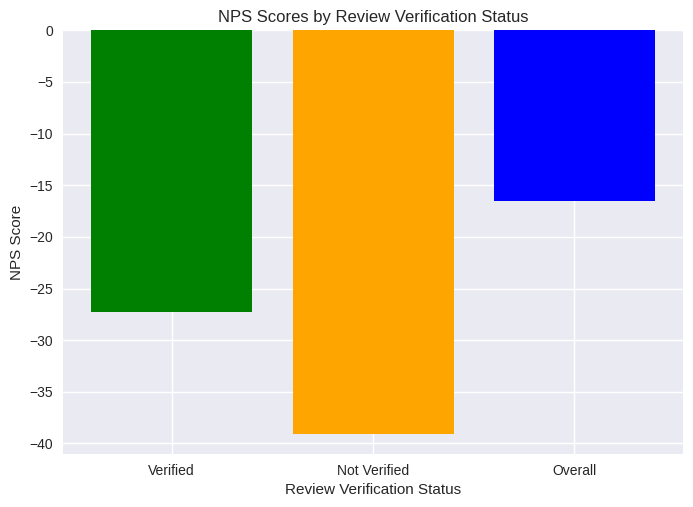

In [26]:
import matplotlib.pyplot as plt

# create a bar chart
nps_scores = [nps_score_verified, nps_score_Notverified, nps_score]
labels = ['Verified', 'Not Verified', 'Overall']
colors = ['green', 'orange', 'blue']
plt.bar(labels, nps_scores, color=colors)

# set chart title and axis labels
plt.title('NPS Scores by Review Verification Status')
plt.xlabel('Review Verification Status')
plt.ylabel('NPS Score')

# display the chart
plt.show()


# NPS by Cabin Flown

In [27]:
# group the dataframe by Cabin_flown
grouped_df = df.groupby('Cabin_flown')

# create a dictionary to store the NPS score for each group
nps_by_cabin = {}

# iterate through each group and calculate the NPS score
for name, group in grouped_df:
    promoters = len(group[group['Recommended'] == 'yes'])
    detractors = len(group[group['Recommended'] == 'no'])
    total_responses = len(group)
    nps_score = round((promoters - detractors) / total_responses * 100, 2)
    nps_by_cabin[name] = nps_score

# print the result
print(nps_by_cabin)


{'Business Class': -6.04, 'Economy Class': -24.64, 'First Class': -1.9, 'Premium Economy': -17.24}


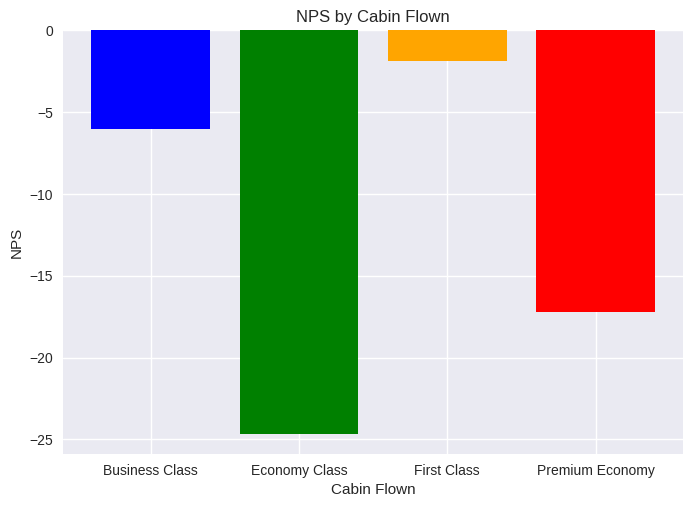

In [28]:
import matplotlib.pyplot as plt

# Define custom colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Group the dataframe by Cabin_flown and calculate NPS for each group
promoters_by_cabin = df.groupby('Cabin_flown')['Recommended'].apply(lambda x: (x == 'yes').sum())
detractors_by_cabin = df.groupby('Cabin_flown')['Recommended'].apply(lambda x: (x == 'no').sum())
total_responses_by_cabin = df.groupby('Cabin_flown')['Recommended'].count()

nps_by_cabin = round((promoters_by_cabin - detractors_by_cabin) / total_responses_by_cabin * 100, 2)

# Create a bar chart of NPS by cabin_flown using custom colors
plt.bar(nps_by_cabin.index, nps_by_cabin.values, color=colors)
plt.title("NPS by Cabin Flown")
plt.xlabel("Cabin Flown")
plt.ylabel("NPS")
plt.show()



In [29]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,Verified_NotVerified,CSAT
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5,Verified,4.50
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,Verified,2.50
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,Verified,1.75
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,Not Verified,1.25
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,Verified,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2,NaN,2.50
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3,NaN,3.75
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4,NaN,4.00
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1,NaN,3.00


# Analysis of Services provided

In [30]:
# calculate the mean for each service category
mean_cabin_staff = round(df['Cabin_Staff_Service'].mean(),2)
mean_food_beverages = round(df['Food_Beverages'].mean(), 2)
mean_ground_service = round(df['Ground_Service'].mean(),2)

# create a dictionary with the means for each category
means = {'Cabin_Staff_Service': mean_cabin_staff,
         'Food_Beverages': mean_food_beverages,
         'Ground_Service': mean_ground_service}

# find the category with the lowest mean
worst_service = min(means, key=means.get)

print('Cabin_Staff_Service', mean_cabin_staff,
         'Food_Beverages', mean_food_beverages,
         'Ground_Service', mean_ground_service)



Cabin_Staff_Service 3.28 Food_Beverages 2.73 Ground_Service 2.87


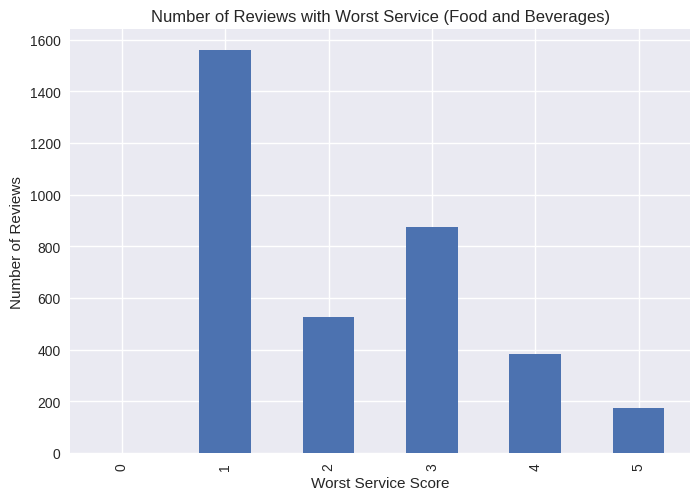

In [31]:
# create a new column with the minimum value of Cabin_Staff_Service, Food_Beverages, and Ground_Service
df['worst_service'] = df[['Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service']].min(axis=1)

# group the dataframe by worst_service and count the number of rows in each group
worst_service_counts = df.groupby('worst_service').size()

# create a bar chart of worst service counts
worst_service_counts.plot(kind='bar')
plt.title("Number of Reviews with Worst Service (Food and Beverages)")
plt.xlabel("Worst Service Score")
plt.ylabel("Number of Reviews")
plt.show()


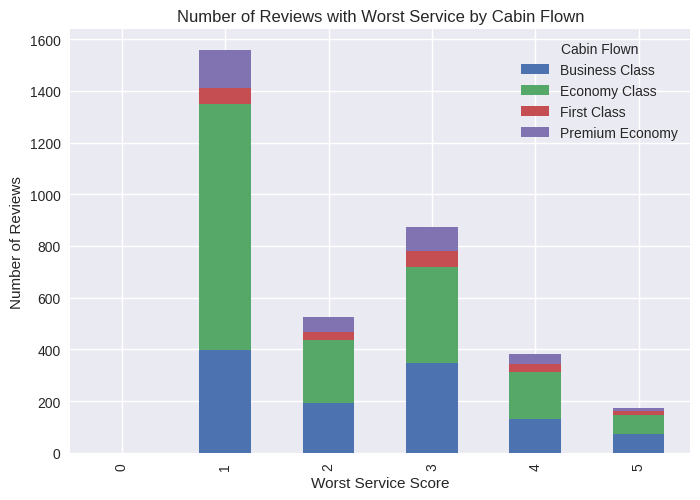

In [32]:
# create a new column with the minimum value of Cabin_Staff_Service, Food_Beverages, and Ground_Service
df['worst_service'] = df[['Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service']].min(axis=1)

# group the dataframe by worst_service and Cabin_flown, and count the number of rows in each group
worst_service_counts = df.groupby(['worst_service', 'Cabin_flown']).size()

# plot the number of reviews with worst service by Cabin_flown
worst_service_counts.unstack().plot(kind='bar', stacked=True)
plt.title("Number of Reviews with Worst Service by Cabin Flown")
plt.xlabel("Worst Service Score")
plt.ylabel("Number of Reviews")
plt.legend(title="Cabin Flown")
plt.show()


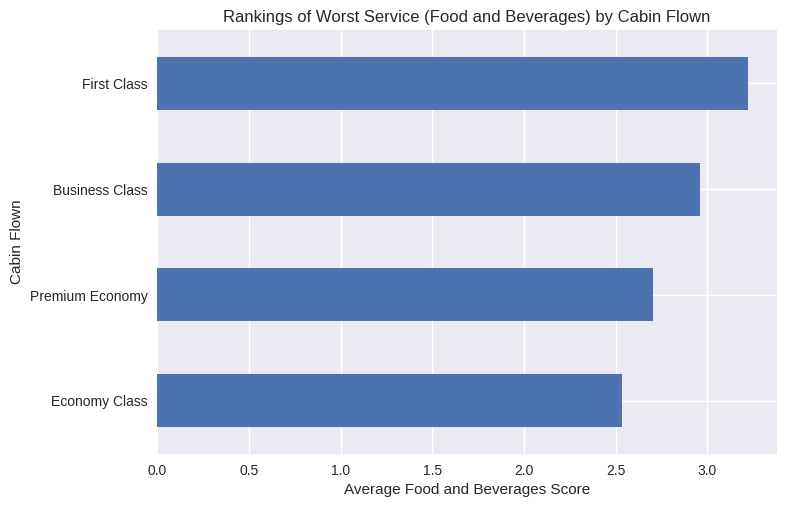

In [33]:
# group the dataframe by Cabin_flown and calculate the average of Food_Beverages scores for each group
worst_service_rankings = df.groupby('Cabin_flown')['Food_Beverages'].mean().sort_values()

# create a bar chart of worst service rankings by Cabin_flown
worst_service_rankings.plot(kind='barh')
plt.title("Rankings of Worst Service (Food and Beverages) by Cabin Flown")
plt.xlabel("Average Food and Beverages Score")
plt.ylabel("Cabin Flown")
plt.show()


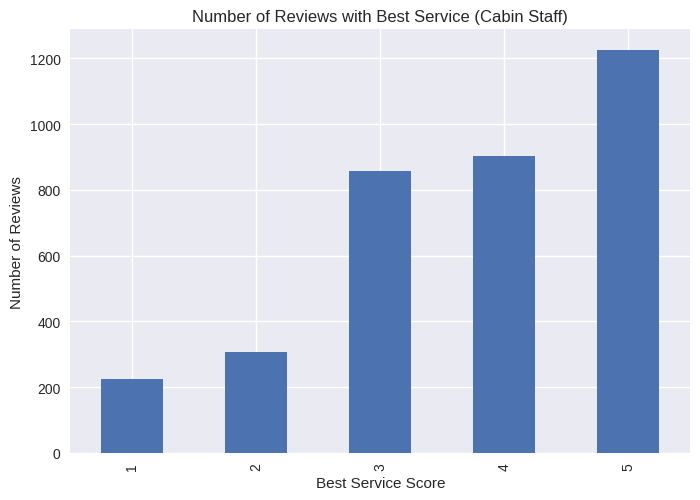

In [34]:
# create a new column with the maximum value of Cabin_Staff_Service, Food_Beverages, and Ground_Service
df['best_service'] = df[['Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service']].max(axis=1)

# group the dataframe by best_service and count the number of rows in each group
best_service_counts = df.groupby('best_service').size()

# create a bar chart of best service counts
best_service_counts.plot(kind='bar')
plt.title("Number of Reviews with Best Service (Cabin Staff)")
plt.xlabel("Best Service Score")
plt.ylabel("Number of Reviews")
plt.show()


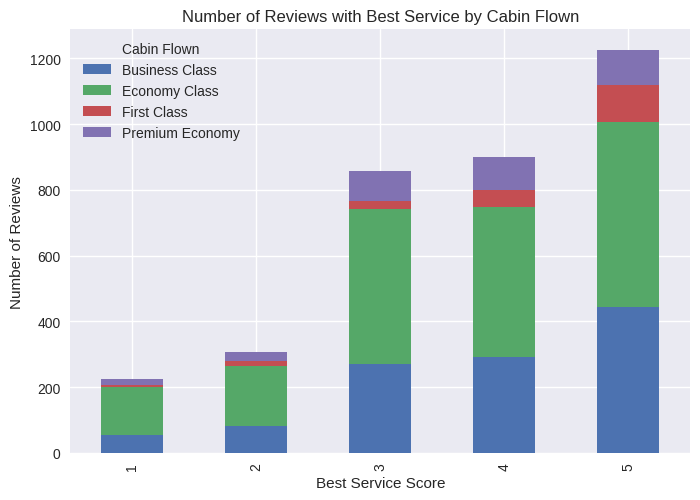

In [35]:
# create a new column with the maximum value of Cabin_Staff_Service, Food_Beverages, and Ground_Service
df['best_service'] = df[['Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service']].max(axis=1)

# group the dataframe by best_service and Cabin_flown, and count the number of rows in each group
best_service_counts = df.groupby(['best_service', 'Cabin_flown']).size()

# plot the number of reviews with best service by Cabin_flown
best_service_counts.unstack().plot(kind='bar', stacked=True)
plt.title("Number of Reviews with Best Service by Cabin Flown")
plt.xlabel("Best Service Score")
plt.ylabel("Number of Reviews")
plt.legend(title="Cabin Flown")
plt.show()


In [36]:
# group the dataframe by Cabin_flown and calculate the mean of Cabin_Staff_Service, Food_Beverages, and Ground_Service
cabin_service_means = df.groupby('Cabin_flown')[['Cabin_Staff_Service', 'Food_Beverages', 'Ground_Service']].mean()

# calculate the total mean of all service columns
cabin_service_means['total_mean'] = cabin_service_means.mean(axis=1)

# sort the dataframe by total mean in descending order
cabin_service_means.sort_values('total_mean', ascending=False, inplace=True)

# print the ranking of cabin flown by best service
print("Ranking of Cabin Flown by Best Service:")
print(cabin_service_means.index)


Ranking of Cabin Flown by Best Service:
Index(['First Class', 'Business Class', 'Premium Economy', 'Economy Class'], dtype='object', name='Cabin_flown')


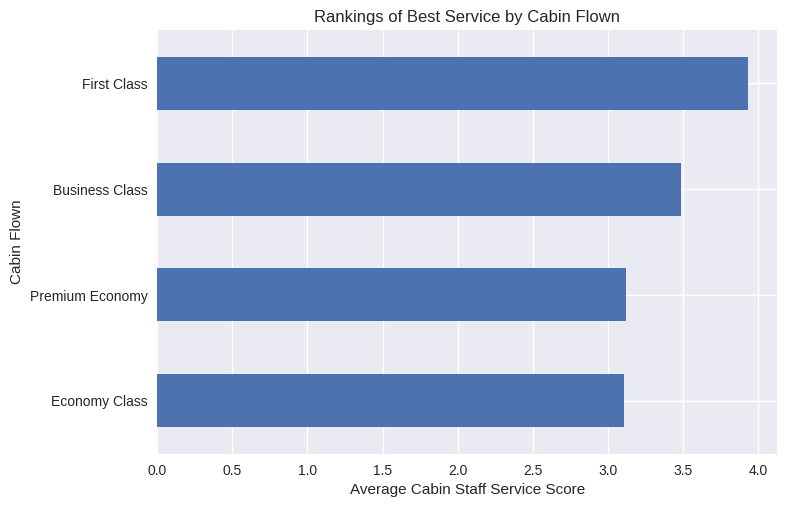

In [37]:
# group the dataframe by Cabin_flown and calculate the average of Cabin_Staff_Service scores for each group
best_service_rankings = df.groupby('Cabin_flown')['Cabin_Staff_Service'].mean().sort_values()

# create a bar chart of best service rankings by Cabin_flown
best_service_rankings.plot(kind='barh')
plt.title("Rankings of Best Service by Cabin Flown")
plt.xlabel("Average Cabin Staff Service Score")
plt.ylabel("Cabin Flown")
plt.show()


In [38]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,Verified_NotVerified,CSAT,worst_service,best_service
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5,Verified,4.50,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,Verified,2.50,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,Verified,1.75,1,4
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,Not Verified,1.25,1,2
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,Verified,3.75,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2,NaN,2.50,2,3
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3,NaN,3.75,3,5
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4,NaN,4.00,3,5
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1,NaN,3.00,3,5


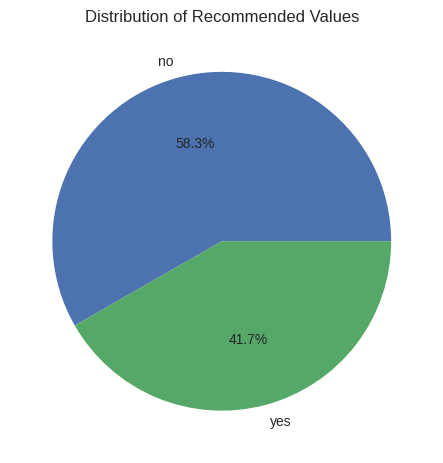

In [39]:
# count the number of reviews with recommended yes or no
recommended_counts = df['Recommended'].value_counts()

# create the pie chart
fig, ax = plt.subplots()
ax.pie(recommended_counts.values, labels=recommended_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Recommended Values')
plt.show()


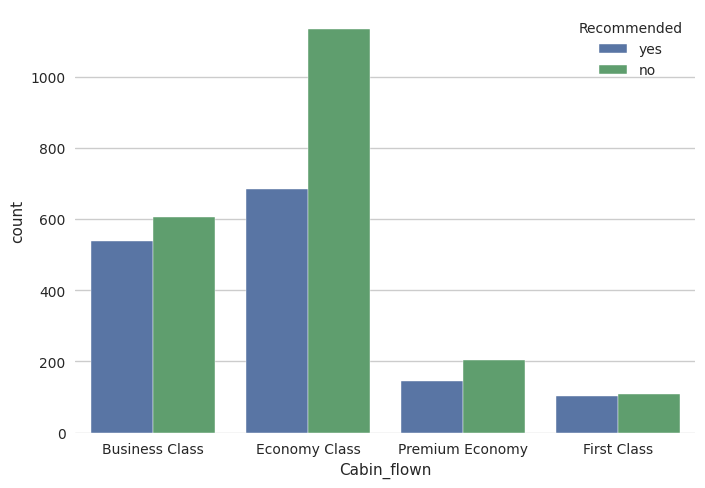

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Cabin_flown', hue='Recommended', data=df)
plt.show()


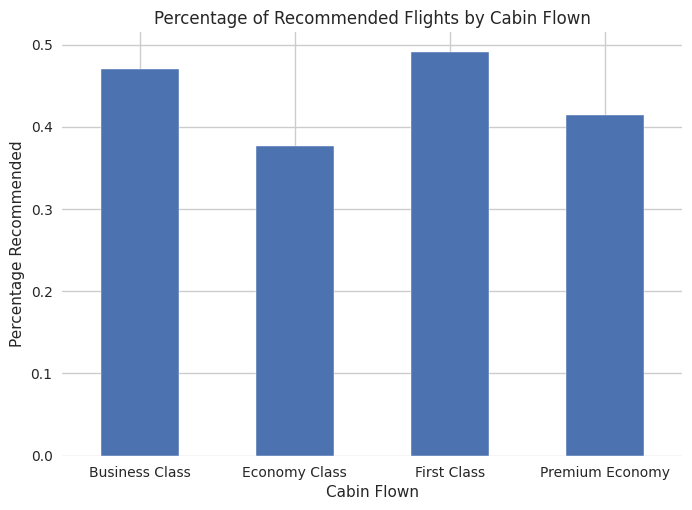

In [41]:


# Calculate the percentage of recommended flights by cabin flown
recommended_by_cabin = df.groupby(['Cabin_flown', 'Recommended'])['Recommended'].count().unstack()
recommended_by_cabin['Percentage'] = recommended_by_cabin['yes'] / recommended_by_cabin.sum(axis=1)

# Plot the results
recommended_by_cabin['Percentage'].plot(kind='bar', rot=0)
plt.title('Percentage of Recommended Flights by Cabin Flown')
plt.xlabel('Cabin Flown')
plt.ylabel('Percentage Recommended')
plt.show()


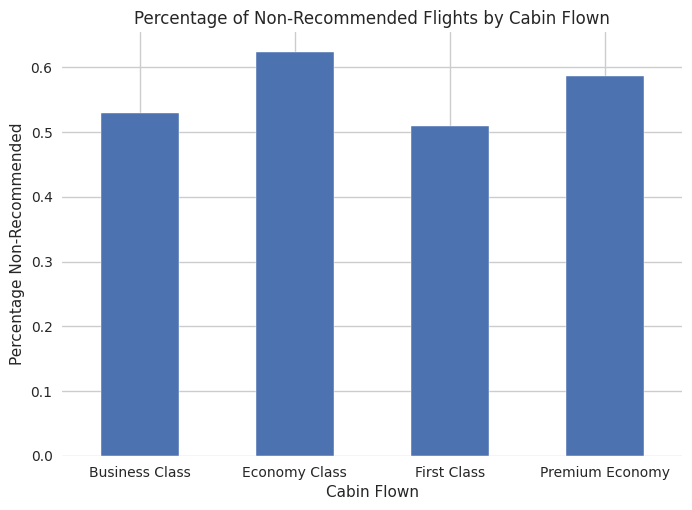

In [42]:
# Calculate the percentage of non-recommended flights by cabin flown
non_recommended_by_cabin = df.groupby(['Cabin_flown', 'Recommended'])['Recommended'].count().unstack()
non_recommended_by_cabin['Percentage'] = non_recommended_by_cabin['no'] / non_recommended_by_cabin.sum(axis=1)

# Plot the results
non_recommended_by_cabin['Percentage'].plot(kind='bar', rot=0)
plt.title('Percentage of Non-Recommended Flights by Cabin Flown')
plt.xlabel('Cabin Flown')
plt.ylabel('Percentage Non-Recommended')
plt.show()


In [43]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,Verified_NotVerified,CSAT,worst_service,best_service
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5,Verified,4.50,3,5
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,Verified,2.50,2,3
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,Verified,1.75,1,4
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,Not Verified,1.25,1,2
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,Verified,3.75,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2,NaN,2.50,2,3
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3,NaN,3.75,3,5
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4,NaN,4.00,3,5
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1,NaN,3.00,3,5


In [46]:
import pandas as pd
from textblob import TextBlob


# Define a function to get the sentiment score for each review
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the "Detailed_review" column
df['sentiment_score'] = round(df['Detailed_review'].apply(get_sentiment),2)

# Print the results
print(df[['Detailed_review', 'sentiment_score']])


                                        Detailed_review  sentiment_score
0     ✅ Trip Verified |  I enjoyed my flight. The bo...             0.26
1     ✅ Trip Verified | Why do you make it so hard? ...             0.04
2     ✅ Trip Verified |  After several delays and ca...             0.04
3     Not Verified |  Literally the worst flight of ...            -0.12
4     ✅ Trip Verified |  I swore I would never fly B...             0.18
...                                                 ...              ...
3516  Business LHR to BKK. 747-400. First try back w...             0.05
3517  LHR to HAM. Purser addresses all club passenge...             0.17
3518  My son who had worked for British Airways urge...             0.14
3519  London City-New York JFK via Shannon on A318 b...             0.35
3520  SIN-LHR BA12 B747-436 First Class. Old aircraf...            -0.02

[3521 rows x 2 columns]


In [47]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,Verified_NotVerified,CSAT,worst_service,best_service,sentiment_score
0,✅ Trip Verified | I enjoyed my flight. The bo...,Solo Leisure,Business Class,Faro to Heathrow,April 2023,yes,5,5,3,5,Verified,4.50,3,5,0.26
1,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,Verified,2.50,2,3,0.04
2,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,Verified,1.75,1,4,0.04
3,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,Not Verified,1.25,1,2,-0.12
4,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,Verified,3.75,3,4,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Business LHR to BKK. 747-400. First try back w...,NaN,Business Class,NaN,NaN,no,3,2,3,2,NaN,2.50,2,3,0.05
3517,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,yes,5,4,3,3,NaN,3.75,3,5,0.17
3518,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,yes,5,4,3,4,NaN,4.00,3,5,0.14
3519,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,no,3,5,3,1,NaN,3.00,3,5,0.35


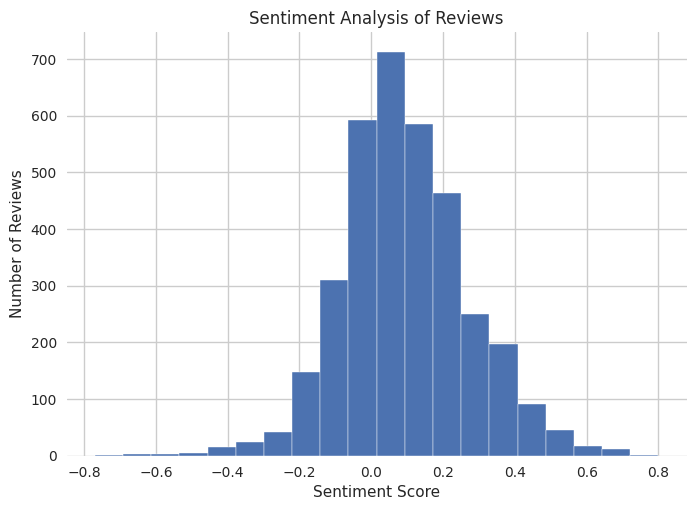

In [48]:
# Plot a histogram of the sentiment scores
plt.hist(df['sentiment_score'], bins=20)
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

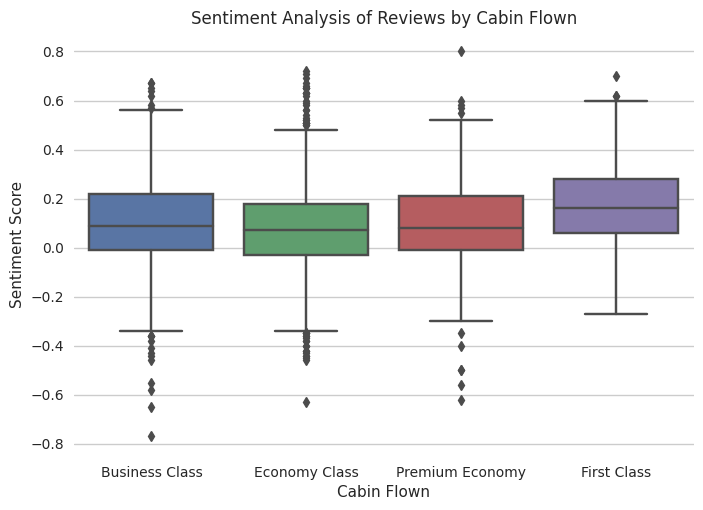

In [49]:
# Plot a boxplot of the sentiment scores by cabin flown
sns.boxplot(x='Cabin_flown', y='sentiment_score', data=df)
plt.title('Sentiment Analysis of Reviews by Cabin Flown')
plt.xlabel('Cabin Flown')
plt.ylabel('Sentiment Score')
plt.show()

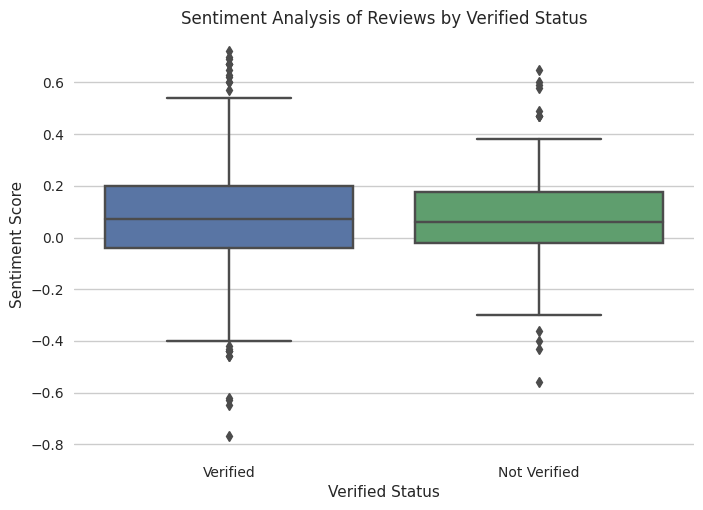

In [50]:
# Plot a boxplot of the sentiment scores by verified status
sns.boxplot(x='Verified_NotVerified', y='sentiment_score', data=df)
plt.title('Sentiment Analysis of Reviews by Verified Status')
plt.xlabel('Verified Status')
plt.ylabel('Sentiment Score')
plt.show()

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Detailed_review'], df['Recommended'], test_size=0.3, random_state=42)

# Define a TfidfVectorizer to convert the text to a numerical representation
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the vectorizer on the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train an SVM model on the vectorized training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_vectorized, y_train)

# Transform the testing data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Predict the recommendations for the testing data
y_pred = svm.predict(X_test_vectorized)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)


Accuracy: 0.8817407757805109
Confusion matrix:
 [[570  42]
 [ 83 362]]


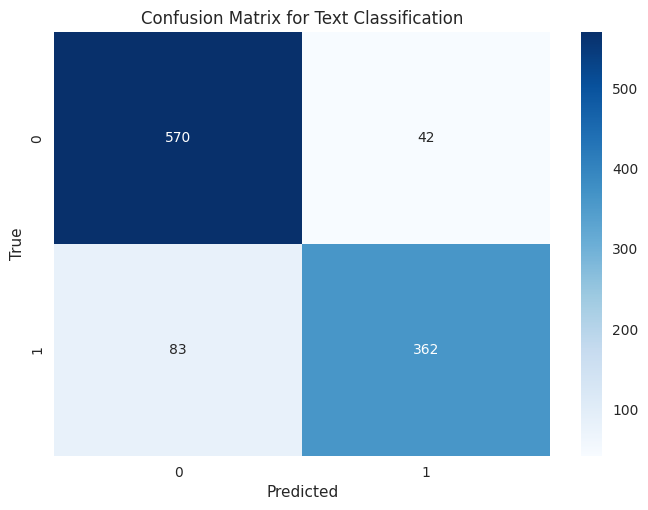

In [54]:
# Plot the confusion matrix using seaborn
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Text Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

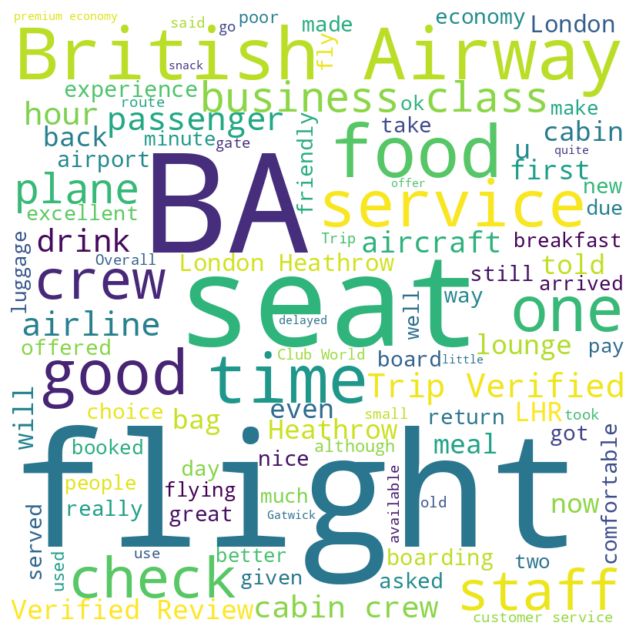

In [56]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the text data into a single string
text = ' '.join(df['Detailed_review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [57]:


# Create new columns for "poor" and "good"
df['contains_poor'] = df['Detailed_review'].str.contains('poor', case=False)
df['contains_good'] = df['Detailed_review'].str.contains('good', case=False)

# Calculate the percentage of reviews that contain "poor" or "good"
num_poor = df['contains_poor'].sum()
num_good = df['contains_good'].sum()
total = len(df)
pct_poor = num_poor / total * 100
pct_good = num_good / total * 100

# Print the results
print(f"{pct_poor:.2f}% of reviews contain the word 'poor'.")
print(f"{pct_good:.2f}% of reviews contain the word 'good'.")



14.74% of reviews contain the word 'poor'.
37.03% of reviews contain the word 'good'.


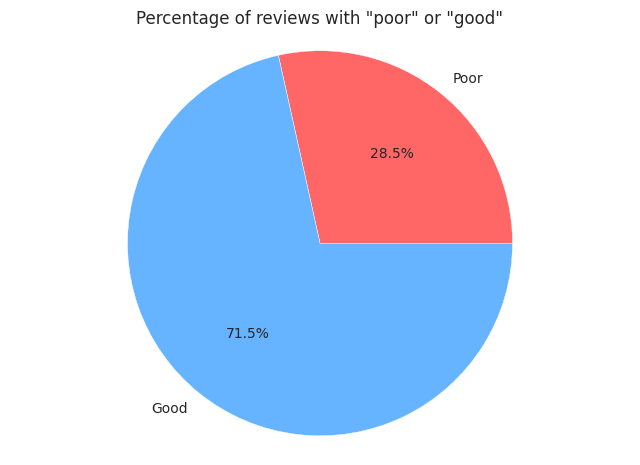

In [58]:
# Plot the results
labels = ['Poor', 'Good']
values = [pct_poor, pct_good]
colors = ['#ff6666', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Percentage of reviews with "poor" or "good"')
plt.show()

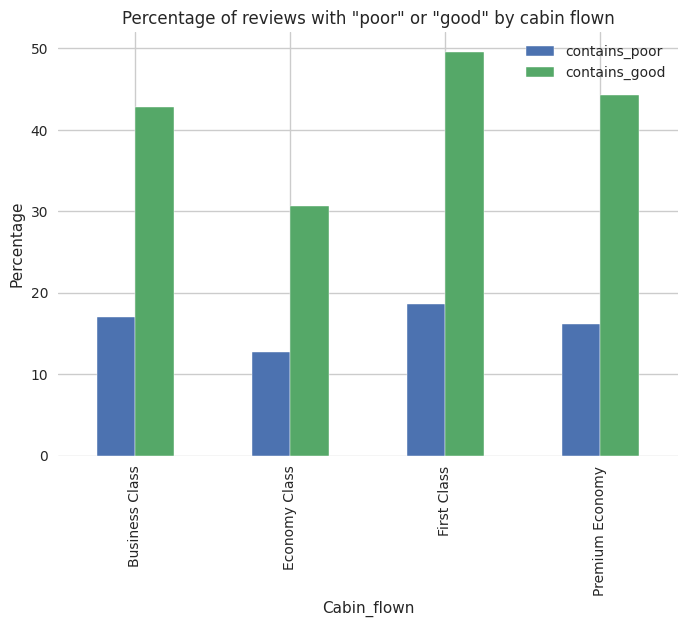

In [60]:
# Group the data by cabin and calculate the percentage of reviews containing each keyword
grouped = df.groupby('Cabin_flown')[['contains_poor', 'contains_good']].mean() * 100

# Plot the results
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax)
ax.set_title('Percentage of reviews with "poor" or "good" by cabin flown')
ax.set_ylabel('Percentage')
plt.show()